## TITULO
aqui va un titulo y descripción con información, por ahora solo coloco nombres:

- Jesús David Petro Ramos
- David Josue Ruiz Morales

In [1]:
#librerias a importar
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

rpath_data = '../data/'
rpath_trans = '../data/csv/'
rpath_data_trans = '../data/data_transient'

# aqui va texto

In [2]:
#leemeos las datas

#data de transientes:
transient_data = pd.read_csv('../data/transient_lightcurves.csv')
transient_data

,ID,observation_id,Mag,Magerr,MJD
0,TranID1409030010044114444,0,18.8765,0.166417,53766.089871
1,TranID1409030010044114444,1,20.0519,0.281733,53990.458866
2,TranID1409030010044114444,2,20.2199,0.295764,53996.286004
3,TranID1409030010044114444,3,21.1192,0.495390,54385.205789
4,TranID1409030010044114444,4,19.3289,0.195002,54355.282285
...,...,...,...,...,...
440464,TranID1209190181234125108,451469,18.1952,0.123607,56189.314816
440465,TranID1209190181234125108,451470,18.2097,0.124706,56189.322996
440466,TranID1209190181234125108,451471,18.5116,0.138816,56205.285887
440467,TranID1209190181234125108,451472,18.3150,0.128915,56205.292631


In [3]:
#data de lectura (labels)
transient_label = pd.read_csv('../data/transient_labels.csv')
transient_label


,Classification,TransientID
0,Flare,1611101400424116462
1,HPM,1611101210274176502
2,HPM,1611101150154137989
3,HPM,1611091630244128695
4,CV,1611091600294129774
...,...,...
5534,SN,711020040154124879
5535,SN,711020040154110403
5536,SN/TDE,711020040064121985
5537,SN,711011210104109439


In [4]:
transient_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440469 entries, 0 to 440468
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              440469 non-null  object 
 1   observation_id  440469 non-null  int64  
 2   Mag             440469 non-null  float64
 3   Magerr          440469 non-null  float64
 4   MJD             440469 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 16.8+ MB


In [5]:
transient_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5539 entries, 0 to 5538
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Classification  5539 non-null   object
 1   TransientID     5539 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 86.7+ KB


# aqui va texto

In [6]:
#quitamos el "TanID" del csv "transient label" para despues poder concatenar
transient_data['ID'] = transient_data['ID'].str.replace('TranID', '').astype(str)
transient_data

,ID,observation_id,Mag,Magerr,MJD
0,1409030010044114444,0,18.8765,0.166417,53766.089871
1,1409030010044114444,1,20.0519,0.281733,53990.458866
2,1409030010044114444,2,20.2199,0.295764,53996.286004
3,1409030010044114444,3,21.1192,0.495390,54385.205789
4,1409030010044114444,4,19.3289,0.195002,54355.282285
...,...,...,...,...,...
440464,1209190181234125108,451469,18.1952,0.123607,56189.314816
440465,1209190181234125108,451470,18.2097,0.124706,56189.322996
440466,1209190181234125108,451471,18.5116,0.138816,56205.285887
440467,1209190181234125108,451472,18.3150,0.128915,56205.292631


In [7]:
transient_label['TransientID'] = transient_label['TransientID'].astype(str)
transient_label = transient_label.rename(columns = {'Classification':'Classification', 'TransientID':'ID'})
transient_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5539 entries, 0 to 5538
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Classification  5539 non-null   object
 1   ID              5539 non-null   object
dtypes: object(2)
memory usage: 86.7+ KB


# concat

In [8]:
transient_merge_data = pd.merge(transient_label, transient_data, on ='ID', how= 'inner')
transient_merge_data

,Classification,ID,observation_id,Mag,Magerr,MJD
0,Flare,1611101400424116462,172281,18.9536,0.165724,53711.407549
1,Flare,1611101400424116462,172282,18.7073,0.149148,53711.414964
2,Flare,1611101400424116462,172283,18.8383,0.157589,53711.422389
3,Flare,1611101400424116462,172284,18.8344,0.157162,53711.429801
4,Flare,1611101400424116462,172285,18.7240,0.149275,53734.378142
...,...,...,...,...,...,...
440464,SN,703201120684101938,237943,21.1999,0.528927,54917.321417
440465,SN,703201120684101938,237944,20.0148,0.278655,55988.342426
440466,SN,703201120684101938,237945,20.6680,0.401302,56015.303520
440467,SN,703201120684101938,237946,19.5785,0.225990,56029.224570


In [9]:
transient_merge_data['ID'].value_counts()

ID
1502081400484121702    564
1304111230414140313    524
801301180474127786     523
803051320384107064     519
1104041230404151904    517
                      ... 
1609030041244102873      1
711091151214121650       1
1611091120214135441      1
711011210104109439       1
1611091600294129774      1
Name: count, Length: 4869, dtype: int64

# aqui va texto

In [10]:
#filtramos ID con mayor a 300 muestras
transient_merge_filtered = transient_merge_data[transient_merge_data['ID'].isin(transient_merge_data['ID'].value_counts()[transient_merge_data['ID'].value_counts() >= 300].index)]
transient_merge_filtered['ID'].value_counts()

ID
1502081400484121702    564
1304111230414140313    524
801301180474127786     523
803051320384107064     519
1204111210464120236    517
                      ... 
1303011350574103320    300
1211131320034233281    300
1112310010184138365    300
1205231210814118357    300
1209171260074119171    300
Name: count, Length: 395, dtype: int64

In [11]:
transient_merge_filtered

,Classification,ID,observation_id,Mag,Magerr,MJD
0,Flare,1611101400424116462,172281,18.9536,0.165724,53711.407549
1,Flare,1611101400424116462,172282,18.7073,0.149148,53711.414964
2,Flare,1611101400424116462,172283,18.8383,0.157589,53711.422389
3,Flare,1611101400424116462,172284,18.8344,0.157162,53711.429801
4,Flare,1611101400424116462,172285,18.7240,0.149275,53734.378142
...,...,...,...,...,...,...
440044,CV,711081290154130838,59043,18.8871,0.173798,56581.308865
440045,CV,711081290154130838,59044,18.9361,0.181661,56589.363189
440046,CV,711081290154130838,59045,19.2549,0.209467,56589.369277
440047,CV,711081290154130838,59046,18.5029,0.148715,56589.375370


# aqui va texto

In [12]:
transient_merge_filtered = transient_merge_filtered.sort_values(by = ['Classification','ID','MJD'])
transient_merge_filtered

,Classification,ID,observation_id,Mag,Magerr,MJD
339180,AGN,1004051040704109194,235974,18.4922,0.169940,53464.337620
339181,AGN,1004051040704109194,235975,18.3785,0.161408,53464.345736
339182,AGN,1004051040704109194,235976,18.7037,0.187554,53464.353807
339183,AGN,1004051040704109194,235977,18.8062,0.196977,53464.361852
339200,AGN,1004051040704109194,235994,18.9661,0.165796,53498.241454
...,...,...,...,...,...,...
71517,YSO?,1410011230234143194,402122,18.3510,0.156437,56581.484319
71592,YSO?,1410011230234143194,402197,18.1235,0.141711,56590.346570
71459,YSO?,1410011230234143194,402064,18.3172,0.153627,56590.356078
71386,YSO?,1410011230234143194,401991,18.5026,0.167991,56590.365581


# aqui va texto

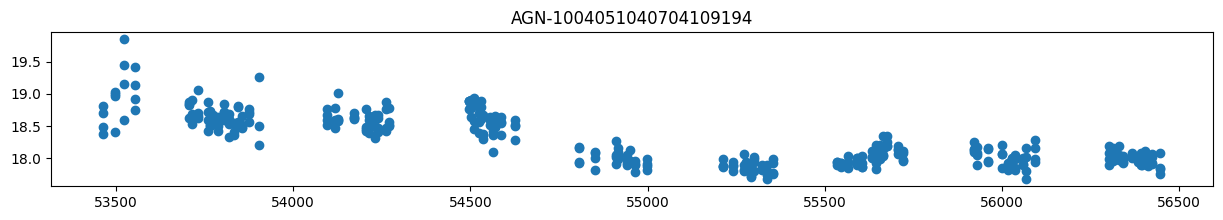

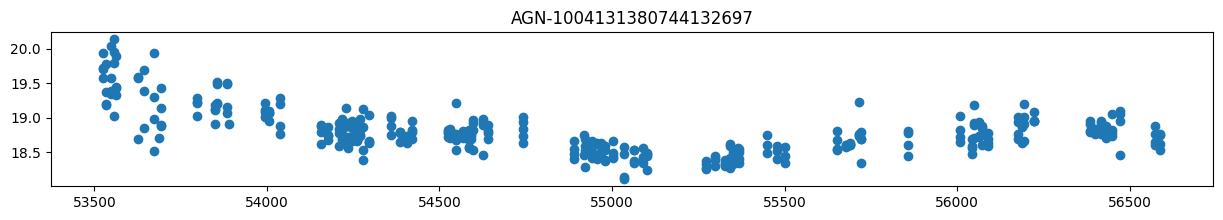

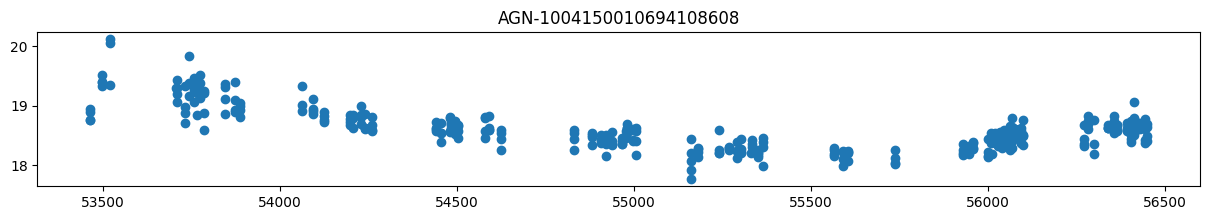

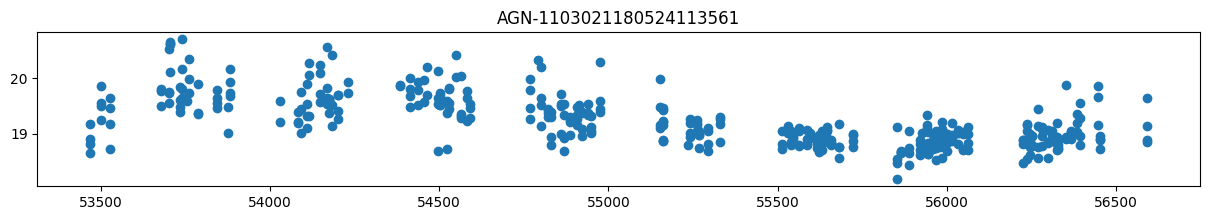

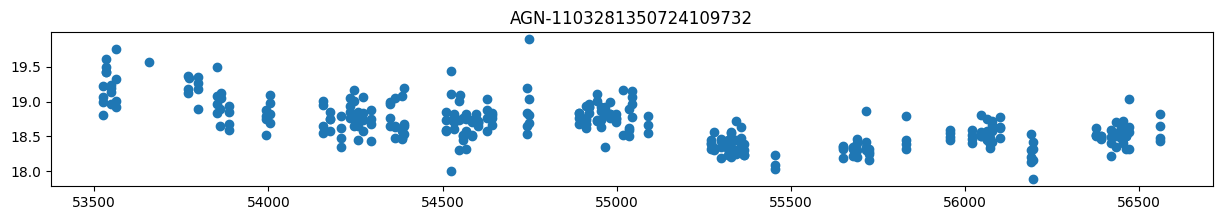

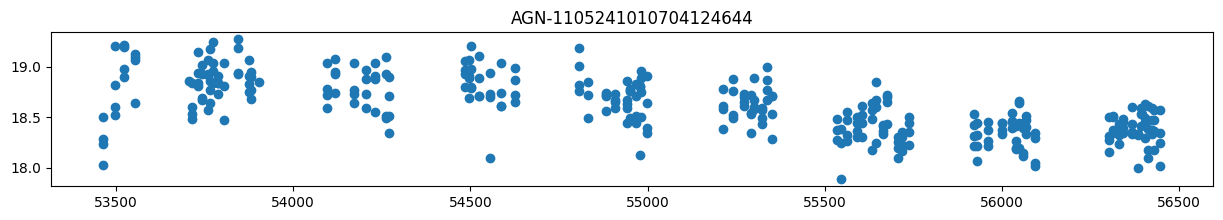

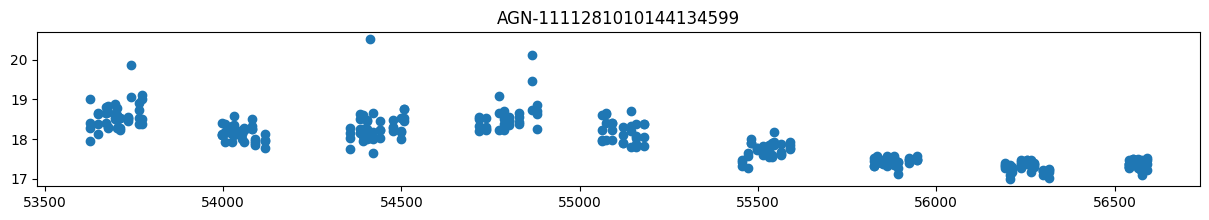

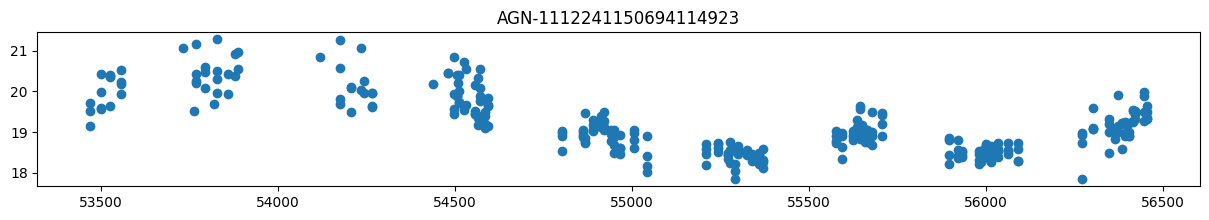

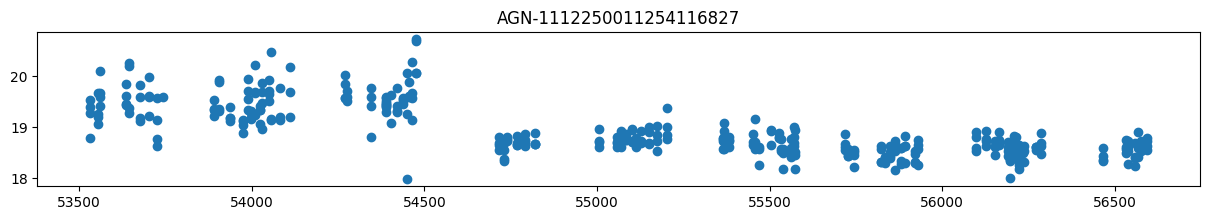

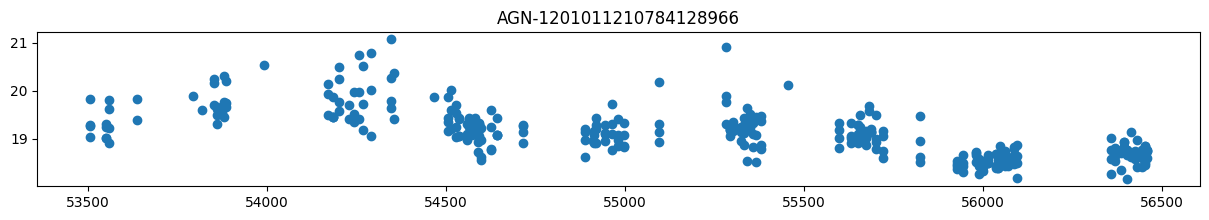

In [13]:
#graficamos una parte

counter = 0

for i in (transient_merge_filtered['ID'].unique()):
    counter += 1
    var = transient_merge_filtered[transient_merge_filtered['ID'] == i]

    plt.figure(figsize = (15,2))
    plt.title('{}-{}'.format(var['Classification'].iloc[0],i))
    plt.scatter(var['MJD'], var['Mag'])

    if counter == 10: break

# aqui va texto

In [14]:
classification = transient_merge_filtered['Classification'].unique()

if not os.path.exists(rpath_trans):
    os.makedirs(rpath_trans)

for classification in classification:
    
    df_classification = transient_merge_filtered[transient_merge_filtered['Classification'] == classification]
    name = f'{classification}.csv'
    file_name = os.path.join(rpath_trans, name.replace('\\','').replace('/','').replace('?','NN'))
    df_classification.to_csv(file_name, index = False)

    print(f'{name}: {file_name}')

AGN.csv: ../data/csv/AGN.csv
AGN/Blazar.csv: ../data/csv/AGNBlazar.csv
AGN/CV.csv: ../data/csv/AGNCV.csv
AGN?.csv: ../data/csv/AGNNN.csv
Blazar.csv: ../data/csv/Blazar.csv
Blazar?.csv: ../data/csv/BlazarNN.csv
CV.csv: ../data/csv/CV.csv
CV?.csv: ../data/csv/CVNN.csv
Carb.csv: ../data/csv/Carb.csv
Carbon.csv: ../data/csv/Carbon.csv
Flare.csv: ../data/csv/Flare.csv
HPM.csv: ../data/csv/HPM.csv
LPV.csv: ../data/csv/LPV.csv
Mira.csv: ../data/csv/Mira.csv
O/Ne.csv: ../data/csv/ONe.csv
OH-IR.csv: ../data/csv/OH-IR.csv
RRL.csv: ../data/csv/RRL.csv
SN.csv: ../data/csv/SN.csv
SN?.csv: ../data/csv/SNNN.csv
Unknown.csv: ../data/csv/Unknown.csv
Var.csv: ../data/csv/Var.csv
Very.csv: ../data/csv/Very.csv
YSO.csv: ../data/csv/YSO.csv
YSO?.csv: ../data/csv/YSONN.csv


# xx

In [55]:
interval = [[0.8, 1.39],
            [0.8, 1.47],
            [0.8, 1.39],
            [0.82, 1.39],
            [0.85, 1.42],
            [0.9, 1.63],
            [0.84, 1.38],
            [0.84, 1.46]]

In [16]:
# Lista de tipos de transientes a analizar
from transient_analysis import TransientDataLoader
from transient_analysis import VisibilityGraphAnalyzer


In [56]:
transient_types = ['AGN', 'Blazar', 'CV', 'Flare', 'HPM', 'LPV', 'SN', 'Var']
loader_transient = {transient_type: [] for transient_type in transient_types}
x_interval = {transient_types[i]: interval[i] for i in range(len(transient_types))}
alpha_values = {transient_type: [] for transient_type in transient_types}

In [57]:
#cargamos todos los loader_transients

for transient_type in transient_types:
    loader = TransientDataLoader(type = transient_type)
    loader_transient[transient_type] = loader
    print(f'Datos cargados para {transient_type}')

Datos cargados para AGN
Datos cargados para Blazar
Datos cargados para CV
Datos cargados para Flare
Datos cargados para HPM
Datos cargados para LPV
Datos cargados para SN
Datos cargados para Var


In [ ]:
for transient_type in transient_types:
    loader_transient[transient_type].edgeList()

In [58]:
print(loader_transient)

{'AGN': <transient_analysis.TransientDataLoader object at 0x0000020B84984C80>, 'Blazar': <transient_analysis.TransientDataLoader object at 0x0000020B84CA5790>, 'CV': <transient_analysis.TransientDataLoader object at 0x0000020B87CC76E0>, 'Flare': <transient_analysis.TransientDataLoader object at 0x0000020B87CEC470>, 'HPM': <transient_analysis.TransientDataLoader object at 0x0000020B8351DEB0>, 'LPV': <transient_analysis.TransientDataLoader object at 0x0000020B83182090>, 'SN': <transient_analysis.TransientDataLoader object at 0x0000020B84998680>, 'Var': <transient_analysis.TransientDataLoader object at 0x0000020B83078FE0>}


### AHORA MISMO ANDO PROBANDO COSAS, ESTO NO AFECTA EN NADA AL CODIGO ORIGINAL

In [51]:
tran_ids = loader_transient['Var'].transient['ID'].unique()
print(len(tran_ids))

11


In [63]:

for idx, i in enumerate(transient_types):
    trans_id = loader_transient[i].transient['ID'].unique()

    v_ids = VisibilityGraphAnalyzer(i, x_interval[i][0], x_interval[i][1])
    for index, j in enumerate(trans_id):
        v_ids.get_alpha(f'../data/transient/{i}/edgeList/', j, i)
    alpha_values[i] = v_ids.alpha



In [64]:
print(alpha_values)

{'AGN': [np.float64(1.79), np.float64(2.25), np.float64(2.26), np.float64(2.55), np.float64(2.18), np.float64(2.52), np.float64(2.55), np.float64(1.71), np.float64(2.19), np.float64(2.73), np.float64(2.12), np.float64(2.33), np.float64(1.91), np.float64(2.42), np.float64(2.63), np.float64(1.68), np.float64(2.01), np.float64(2.51), np.float64(2.55), np.float64(2.76), np.float64(2.28), np.float64(2.18), np.float64(2.31), np.float64(2.5), np.float64(2.31), np.float64(2.63), np.float64(2.18), np.float64(2.27), np.float64(2.14), np.float64(2.33), np.float64(2.15), np.float64(2.1), np.float64(2.04), np.float64(2.7), np.float64(2.19), np.float64(2.1), np.float64(2.5), np.float64(2.6), np.float64(2.34), np.float64(2.49), np.float64(2.59), np.float64(3.06), np.float64(2.37), np.float64(2.09), np.float64(2.14), np.float64(1.9), np.float64(2.51), np.float64(1.75), np.float64(2.17), np.float64(2.48), np.float64(2.35), np.float64(2.5), np.float64(1.84)], 'Blazar': [np.float64(2.35), np.float64(2.0)

In [65]:
df_result =  pd.DataFrame([(k, v) for k, vals in alpha_values.items() for v in vals], columns=['Type', 'Value'])
df_result

,Type,Value
0,AGN,1.79
1,AGN,2.25
2,AGN,2.26
3,AGN,2.55
4,AGN,2.18
...,...,...
363,Var,2.13
364,Var,2.68
365,Var,2.14
366,Var,2.29


### Violin plot using median

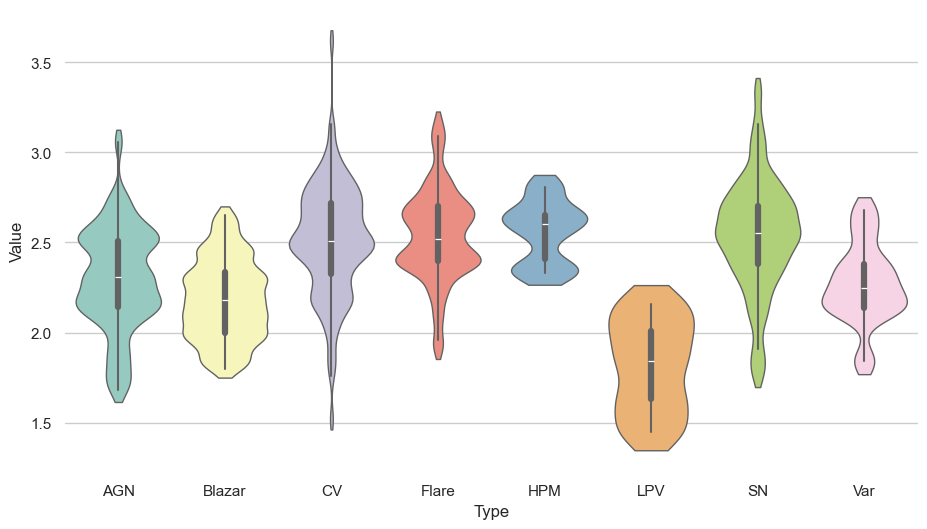

In [75]:
import seaborn as sns 

sns.set_theme(style='whitegrid')
f, ax = plt.subplots(figsize = (11,6))

palette = sns.color_palette('viridis', as_cmap=True)
sns.violinplot(data = df_result, x = 'Type', y = 'Value', hue = 'Type', orient='x', bw_adjust=.5, cut=1, linewidth=1, palette="Set3", legend=False)
sns.despine(left=True, bottom=True)

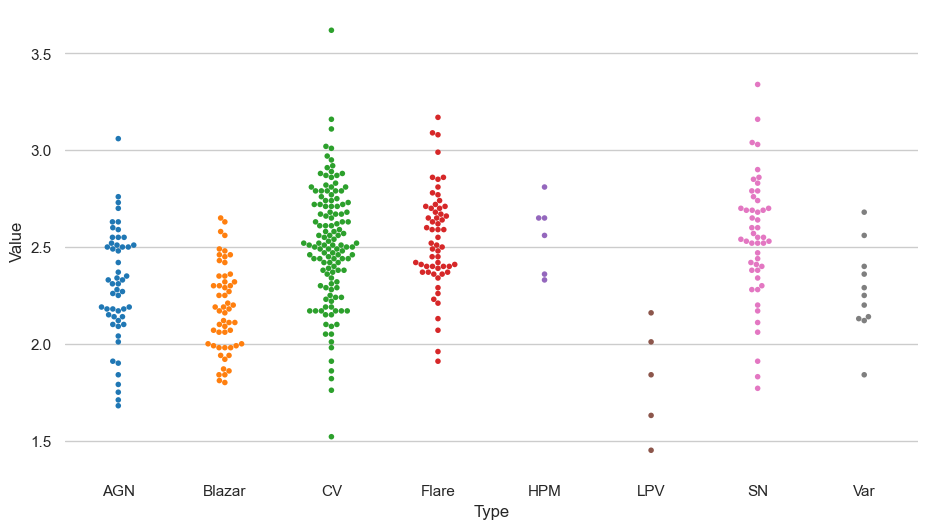

In [73]:
sns.set_theme(style="whitegrid")

f, ax = plt.subplots(figsize=(11, 6))

palette = sns.color_palette("viridis", as_cmap=True)

sns.swarmplot(data=df_result, x="Type", y="Value", hue="Type", palette='tab10', size=4, legend=False)
sns.despine(left=True, bottom=True)

### ESTO SI AFECTA

In [ ]:
from transient_analysis import VisibilityGraphAnalyzer
lista_aux = []

for index, transient_type in enumerate(transient_types): 
    
    loader = loader_transient[transient_type] #analizamos cada transiente por ciclo
    ids = loader.transient['ID'].unique() #sacamos los id's unicos para evitar que se repitan.

    li_fit = x_interval[transient_type][0]
    ls_fit = x_interval[transient_type][1]
    graph_analyzer = VisibilityGraphAnalyzer(type = transient_type, li_fit=li_fit, ls_fit=ls_fit)
    
    for trans_id in ids:
        x = graph_analyzer.get_alpha(edgePath=loader._edgePath, id = trans_id, name = transient_type)
        print(x)

    print(graph_analyzer.values)
    break


In [ ]:
# 

# alpha_values = {transient_type: [] for transient_type in transient_types}
for transient_type in transient_types: 
    loader = loader_transient[transient_type]
    ids = loader.transient['ID'].unique()
    graph_analyzer = VisibilityGraphAnalyzer(type = transient_type)

    for trans_id in ids:
        x = graph_analyzer.get_alpha(edgePath=loader._edgePath, id = trans_id, name= transient_type)
        print(x)


# for transient_type in transient_types: 
#     loader = TransientDataLoader(type = transient_type)
#     ids = loader.transient['ID'].unique()
    

#     for trans_id in ids: 
#         print(f'Procesando ID {trans_id} para {transient_type}')
#         graph_analyzer = VisibilityGraphAnalyzer(type = transient_type)

#         pass